In [15]:
!pip install eikonalfm

  Created wheel for eikonalfm: filename=eikonalfm-0.9.5-cp37-cp37m-linux_x86_64.whl size=93311 sha256=5629bc05c2add35709ab58ad8361a4dc0ed4ea02334ba933433e9e141e87f858
  Stored in directory: /root/.cache/pip/wheels/e7/3e/c9/d101978dda8f0677a3aab39aab1fbabfb43ff8a89949c790e6
Successfully built eikonalfm


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
data_set = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/nn_investigations/syst_obs.csv')
seism_trace = np.load('/content/gdrive/MyDrive/Colab Notebooks/nn_investigations/seism.npy')

In [54]:
# 200 приемников на один источник
# шаг между приемниками 10
# источники меняются с шагом 20
data_set

,FFID,SOUX,SOUZ,RECX,RECZ,CDPX,CDPX_bin
0,1,1000.0,0,0.0,0,500.0,500.0
1,1,1000.0,0,10.0,0,505.0,505.0
2,1,1000.0,0,20.0,0,510.0,510.0
3,1,1000.0,0,30.0,0,515.0,515.0
4,1,1000.0,0,40.0,0,520.0,520.0
...,...,...,...,...,...,...,...
19995,100,2980.0,0,3930.0,0,3455.0,3455.0
19996,100,2980.0,0,3940.0,0,3460.0,3460.0
19997,100,2980.0,0,3950.0,0,3465.0,3465.0
19998,100,2980.0,0,3960.0,0,3470.0,3470.0


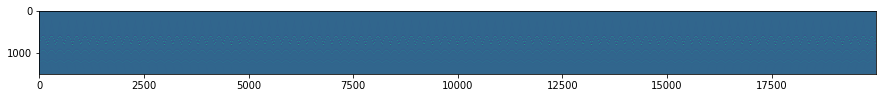

In [5]:
fig = plt.figure(figsize=(15,6))
plt.imshow(seism_trace.T);


In [6]:
dt = 0.001
dx = 10
dz = 10 
x_set = np.arange(0,3970 + dx, dx)
z_set = np.arange(0,2000 + dz, dz)
velocity = np.zeros((len(z_set),len(x_set)))
for i in range(len(z_set)):
  if i < 50:
    velocity[i,:] = 2000
  elif (i >= 50 and i < 100):
    velocity[i,:] = 3000
  elif (i >= 100 and i < 150):
    velocity[i,:] = 4000
  elif (i >= 150 and i <= 200):
    velocity[i,:] = 5000

In [7]:
velocity.shape

(201, 398)

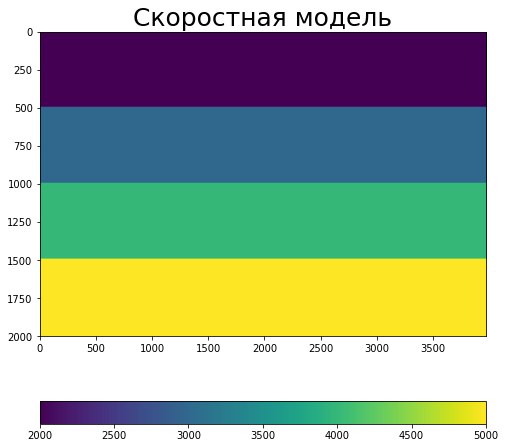

In [35]:
# Скоростная модель
fig = plt.figure(figsize=(8,8))
im = plt.imshow(velocity,
                aspect = 'auto',
                extent = [x_set[0],
                          x_set[-1],
                          z_set[-1],
                          z_set[0]]
               )
plt.title('Скоростная модель',size = 25)
plt.colorbar(im,orientation = 'horizontal')
plt.show()

In [73]:
import eikonalfm

x_s = (0, 100)# первый индекс z, второй x. Это индексы в массиве координат 
dx = (1.0, 1.0)
order = 2

tau_fm = eikonalfm.fast_marching(velocity, x_s, dx, order)

In [19]:
help(eikonalfm.fast_marching)

Help on built-in function fast_marching in module eikonalfm.cfm:

fast_marching(c, x_s, dx, order)
    Calculates the fast marching solution to the eikonal equation.
    
    Parameters
    ----------
    c : ndarray
        (background) velocity array, c(x) > 0.
    x_s : sequence of ints
        Source position as index vector, e.g. ``(0, 0)``. Must have the same length as the number of dimensions of c.
    dx : sequence of doubles
        Grid spacing for each dimension, dx > 0. Must have the same length as the number of dimensions of c.
    order : {1, 2}
        Order of the finite difference operators.
    
    Returns
    ----------
    tau : ndarray
        numerical solution tau for the eikonal equation.



In [74]:
tau_fm.shape

(201, 398)

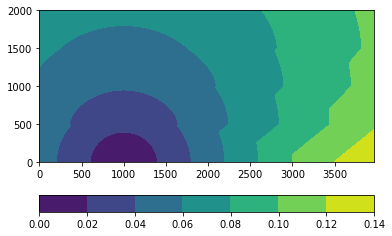

In [88]:
# tau0 = eikonalfm.distance(tau_fm.shape, dx, x_s, indexing="ij") ?  не понял метод
im1 = plt.contourf(( tau_fm), # здесь в скобках может стоять tau0*tau_fm
                 extent = [x_set[0],
                          x_set[-1],
                          z_set[0],
                          z_set[-1]])
plt.colorbar(im1,orientation = 'horizontal')
plt.show();

In [80]:
tau_fm.shape

(201, 398)

1010